In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from uncertainties import ufloat
from uncertainties import umath
import math

In [3]:
def calculateTimeIntervall(filename, peaks):
    f = open(filename, "r")
    n=float(f.readlines()[6][16:21])
    steps=[]
    for i in range(len(peaks)-1):
        steps.append(peaks[i+1]-peaks[i])
    print(n)
    return ufloat((n*np.array(steps)).mean(), (n*np.array(steps)).std())

def smallTimeIntervall(filename, peaks):
    f = open(filename, "r")
    n=float(f.readlines()[6][16:21])
    steps=[]
    for i in range(len(peaks)-1):
        steps.append(peaks[i+1]-peaks[i])
    return n*np.array(steps)

In [4]:
sns.set_theme(style="ticks")
sns.set_context("paper")

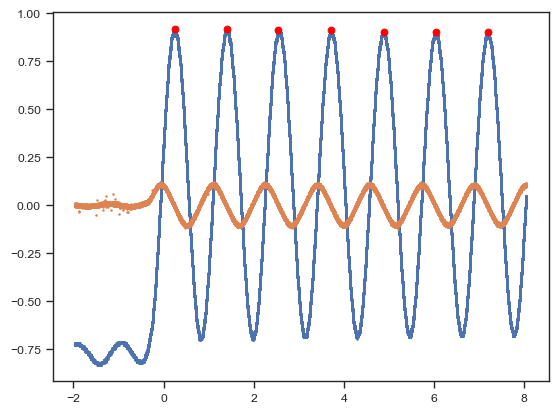

[ 27620  42214  56328  70887  85722  99935 114561]
8e-05
Period of the undamped Oscillator: 1.159+/-0.020


In [6]:
filename="T0005.CSV"
df=pd.read_csv(filename, header=14)
plt.scatter(df["TIME"], df["CH1"], s = 1)
plt.scatter(df["TIME"], df["CH2"], s = 1)
peaks=scipy.signal.find_peaks(df["CH1"], prominence=0.1, distance=10000, height=0.5)
plt.scatter(df["TIME"][peaks[0]], df["CH1"][peaks[0]], color="red")
plt.show()
print(peaks[0])
res_period_1=calculateTimeIntervall(filename, peaks[0])
print("Period of the undamped Oscillator: " + str(res_period_1))